In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import DiadFit as pf
import datetime

In [2]:
# Charlotte collected this data on June 7th, 0.56 g/cm3 to 1.05 g/cm3
input_file_path=os.getcwd()+'\Input_files'
HPjune_data_path=input_file_path+'/'+"merged_df_wrho-6-7-23.xlsx"

hpjune=pd.read_excel(HPjune_data_path)
hpjune['Corrected_Splitting_1220_1400']=hpjune['Splitting']*hpjune['Ne_corr_1400_1220']

hpjune=hpjune.drop(columns=[col for col in hpjune.columns if 'Unnamed' in col])
hpjune.head()



,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,1117_1447_old,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Corrected_Splitting_1220_1400
0,FDCA-P1-1,0.648713,310.15,1.040000,64.871318,66.4600,36.970,36.970,36.970,36.970,...,0.997595,0.997595,0.997263,1.002603,0.997336,0.997595,0.997350,0.997183,0.996687,105.243386
1,FDCA-P1-2,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,0.997594,0.997594,0.997262,1.002602,0.997335,0.997594,0.997350,0.997182,0.996686,105.247966
2,FDCA-P1-3,NaN,NaN,NaN,NaN,66.4600,36.970,36.970,36.970,36.970,...,0.997594,0.997594,0.997262,1.002602,0.997335,0.997594,0.997349,0.997182,0.996686,105.246976
3,FDCA-P2-1,0.592398,310.15,1.025959,59.239802,60.1811,36.974,36.975,36.976,36.976,...,0.997588,0.997588,0.997256,1.002594,0.997327,0.997588,0.997340,0.997176,0.996680,105.185753
4,FDCA-P2-2,NaN,NaN,NaN,NaN,60.1815,36.976,36.977,36.978,36.979,...,0.997587,0.997587,0.997256,1.002594,0.997326,0.997587,0.997339,0.997175,0.996679,105.183991


In [3]:
hpjune['Ne_corr_1400_1220'].head()

0    0.996687
1    0.996686
2    0.996686
3    0.996680
4    0.996679
Name: Ne_corr_1400_1220, dtype: float64

In [4]:
# Charlotte collected this data on June 8th, 0.22-0.66 g/cm3. Its the new high pressure sensor, 
# so shows less extreme curves, but still some curve. 
MPjune_HPsens_data_path=input_file_path+'/'+"merged_df_wrho-6-8-23.xlsx"


mpjune_hpsens=pd.read_excel(MPjune_HPsens_data_path)
mpjune_hpsens['Corrected_Splitting_1220_1400']=mpjune_hpsens['Splitting']*mpjune_hpsens['Ne_corr_1400_1220']

mpjune_hpsens=mpjune_hpsens.drop(columns=[col for col in mpjune_hpsens.columns if 'Unnamed' in col])
mpjune_hpsens.head()


,Label,P_kbar,T_K,CO2_dens_gcm3,P_Mpa_target,P_manual,T0_manual,T1_manual,T2_manual,T3_manual,...,1117_1447_old,1117_1447_new,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Corrected_Splitting_1220_1400
0,FDCA-P28-1,0.095909,310.15,0.660905,9.590924,9.6752,36.975,36.976,36.976,36.976,...,0.997535,0.997535,0.997188,1.002531,0.997279,0.997279,0.997301,0.997128,0.996619,104.171188
1,FDCA-P29-1,0.093876,310.15,0.646865,9.387566,9.4594,37.002,37.003,37.003,37.003,...,0.997536,0.997536,0.997192,1.002530,0.997279,0.997279,0.997302,0.997131,0.996622,104.116445
2,FDCA-P30-1,0.092172,310.15,0.632824,9.217169,9.2497,36.978,36.980,36.981,36.982,...,0.997536,0.997536,0.997192,1.002530,0.997279,0.997279,0.997302,0.997131,0.996622,104.117712
3,FDCA-P31-1,0.090746,310.15,0.618784,9.074609,9.0269,36.995,36.994,36.993,36.993,...,0.997537,0.997537,0.997196,1.002531,0.997280,0.997280,0.997303,0.997134,0.996625,104.067230
4,FDCA-P32-1,0.089553,310.15,0.604743,8.955350,8.9823,37.015,37.015,37.015,37.016,...,0.997537,0.997538,0.997197,1.002531,0.997280,0.997280,0.997304,0.997135,0.996626,104.055298


In [5]:
hpjune['Ne_corr_1400_1220'].head()

0    0.996687
1    0.996686
2    0.996686
3    0.996680
4    0.996679
Name: Ne_corr_1400_1220, dtype: float64

In [6]:
mpjune_hpsens['Ne_corr_1400_1220'].head()

0    0.996619
1    0.996622
2    0.996622
3    0.996625
4    0.996626
Name: Ne_corr_1400_1220, dtype: float64

In [7]:
# This data was collected on June 1st and 2nd by Penny Wieser, using the new low P sensor, 
# densities ranging from 0.009 to 0.68 g/cm3 (because sensor tops out at 10 MPa)
# Day 1 was 0.2-0.68, Day 2 (June 2nd) was very low densities. 
PW_data_path=input_file_path+'/'+"merged_df_wrho_PWdata.xlsx"

lpmpjune=pd.read_excel(PW_data_path)
lpmpjune['Corrected_Splitting_1220_1400']=lpmpjune['Splitting']*lpmpjune['Ne_corr_1400_1220']

lpmpjune=lpmpjune.drop(columns=[col for col in lpmpjune.columns if 'Unnamed' in col])
lpmpjune['Corr_Split_1σ_val']=lpmpjune['Corr_Split+1σ']-lpmpjune['Corrected_Splitting']
lpmpjune.head()


,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,...,Ne_corr_fact_1447_1117_V77,1220_1447_new,1220_1400_new,1117_1400_new,Ne_corr_1447_1117,Ne_corr_1400_1117,Ne_corr_1447_1220,Ne_corr_1400_1220,Corrected_Splitting_1220_1400,Corr_Split_1σ_val
0,104.317427,104.319067,104.315787,12 C6_CRR_DiadFit,104.569330,0.002040,0.001474,1282.899792,0.001234,8503.996689,...,0.997592,0.997239,1.002552,0.997290,0.997592,0.997387,0.997225,0.996741,104.228496,0.001640
1,104.253899,104.255586,104.252212,14 C7_CRR_DiadFit,104.506344,0.002089,0.001527,1283.055183,0.001320,4159.640332,...,0.997585,0.997233,1.002546,0.997285,0.997585,0.997375,0.997215,0.996729,104.164535,0.001687
2,104.191284,104.193021,104.189548,16 C8,104.444319,0.002222,0.001583,1283.206389,0.001248,2439.022384,...,0.997578,0.997228,1.002543,0.997282,0.997578,0.997364,0.997204,0.996717,104.101463,0.001736
3,104.187881,104.189711,104.186050,17 C9,104.441140,0.002336,0.001687,1283.204984,0.001410,2470.540943,...,0.997576,0.997226,1.002540,0.997280,0.997576,0.997360,0.997201,0.996714,104.097904,0.001831
4,104.039708,104.041630,104.037786,19 C10,104.293657,0.002524,0.001787,1283.523492,0.001324,2413.101156,...,0.997566,0.997218,1.002530,0.997271,0.997566,0.997345,0.997186,0.996697,103.949166,0.001922


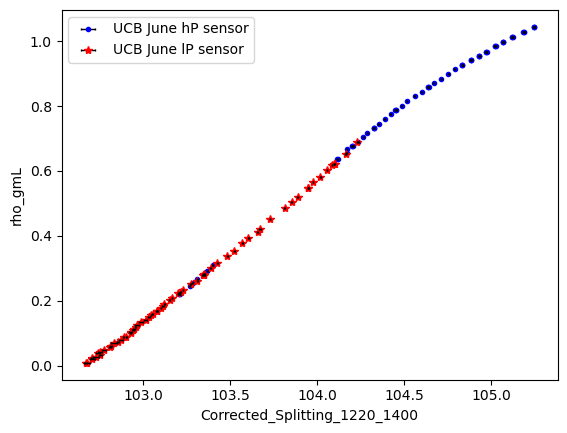

In [8]:
# Filter out bad ones from the high pressure sensor and concatenate the frames 
test=mpjune_hpsens.drop(columns=['Offset','filename_merge'])
hpsens_june=pd.concat([test,hpjune])

cali_pts_hpsens=hpsens_june[~(hpsens_june['rho_gmL'].between(0.325,0.63))]

# Filter out bad ones from low pressure sensor and concat frames
lpsens_june=lpmpjune.copy()
cali_pts_lpsens=lpsens_june[~(lpsens_june['rho_gmL'].between(0.46,0.48))]
cali_pts_lpsens = cali_pts_lpsens.replace([np.inf, -np.inf], np.nan)

cali_pts_lpsens = cali_pts_lpsens.dropna(subset=['rho_gmL'])

fig,ax=plt.subplots()

x='Corrected_Splitting_1220_1400'
y='rho_gmL'
y_pw='rho_gmL'


ax.errorbar(x=cali_pts_hpsens[x],y=cali_pts_hpsens[y], xerr=cali_pts_hpsens['Corr_Split_1σ_val'], fmt='.',
             color='blue',mfc='blue', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June hP sensor')


ax.errorbar(x=cali_pts_lpsens[x],y=cali_pts_lpsens[y_pw], xerr=cali_pts_lpsens['Corr_Split_1σ_val'], fmt='*',
             color='red',mfc='red', ecolor='black', elinewidth=1,capsize=1,barsabove=True,zorder=2,
           label='UCB June lP sensor')

ax.set_xlabel(x)
ax.set_ylabel(y)

plt.legend()


plt.show()

In [9]:
full=pd.concat([pd.DataFrame(data={'Split':cali_pts_hpsens[x],'rho':cali_pts_hpsens[y],'spliterr':cali_pts_hpsens['Corr_Split_1σ_val']}),pd.DataFrame(data={'Split':cali_pts_lpsens[x],'rho':cali_pts_lpsens[y_pw],'spliterr':cali_pts_lpsens['Corr_Split_1σ_val']})])
full_sort=full.sort_values('rho')
# plt.scatter(full_sort['Split'],full_sort['rho'])

In [10]:
full_sort

,Split,rho,spliterr
55,102.679846,0.009599,0.015294
61,102.671607,0.009822,0.009489
54,102.710167,0.020584,0.015494
60,102.706986,0.023385,0.006127
53,102.729293,0.028575,0.016037
...,...,...,...
4,105.183991,1.028444,0.003500
3,105.185753,1.028451,0.003393
2,105.246976,1.043820,0.003604
1,105.247966,1.043831,0.003450


In [20]:
np.max(full_sort['Split'])

105.2479662093151

In [11]:
Split_col='Split'
CO2_dens_col='rho'
split_error='spliterr'
CO2_dens_error=0.01
save_suffix='UCB_1220_1400'
eq_division='ccmr'


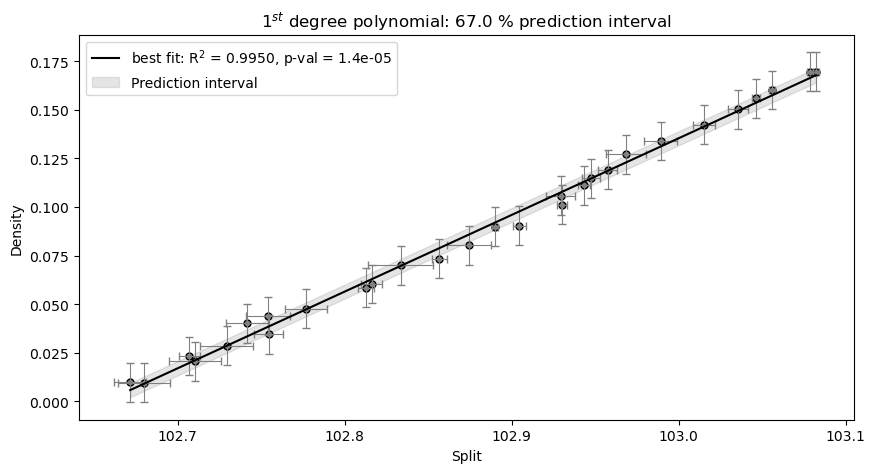

In [12]:
CI=0.67
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Low',N_poly=1, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


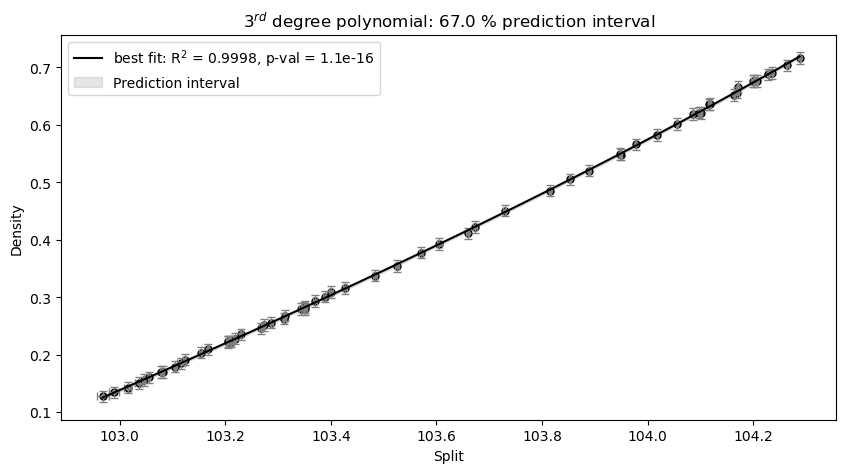

In [13]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort,Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='Medium',N_poly=3, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)


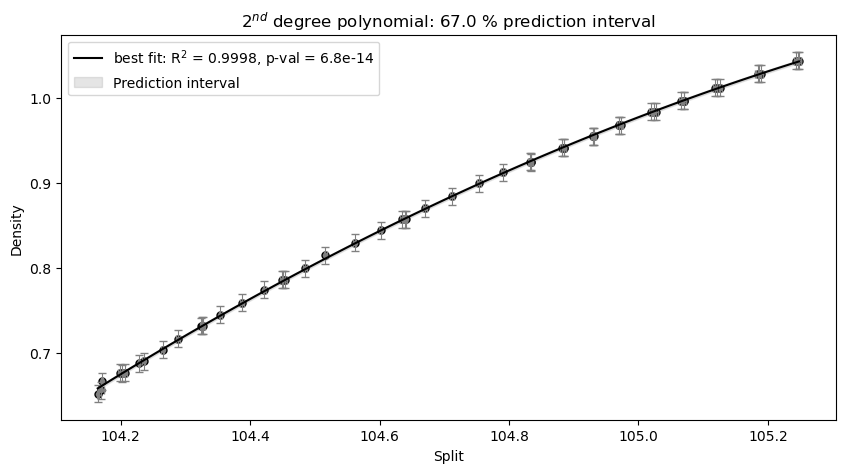

In [14]:
pf.plot_and_save_CO2cali_pickle(cali_data=full_sort, Split_col=Split_col, CO2_dens_col=CO2_dens_col, 
split_error=split_error,CO2_dens_error=CO2_dens_error, density_range='High',N_poly=2, CI=CI, 
std_error=True,save_fig=True,eq_division=eq_division,save_suffix=save_suffix)

In [15]:
import pickle
# This gets the densimeter at low density
pickle_str_lowr='Lowrho_polyfit_dataUCB_1220_1447.pkl'
with open(pickle_str_lowr, 'rb') as f:
    lowrho_pickle_data = pickle.load(f)

# This gets the densimeter at medium density
pickle_str_medr='Mediumrho_polyfit_dataUCB_1220_1447.pkl'
with open(pickle_str_medr, 'rb') as f:
    medrho_pickle_data = pickle.load(f)
# This gets the densimeter at high density.
pickle_str_highr='Highrho_polyfit_dataUCB_1220_1447.pkl'
with open(pickle_str_highr, 'rb') as f:
    highrho_pickle_data = pickle.load(f)

In [16]:
plt.plot(split, lowrho_pickle_data['model'](split), '-r')
plt.plot(split, medrho_pickle_data['model'](split), '-k')
plt.plot(split, highrho_pickle_data['model'](split), '-b')


NameError: name 'split' is not defined

In [ ]:
split=np.linspace(102.8, 105.5, 100)
low_rho=lowrho_pickle_data(split)

TypeError: 'dict' object is not callable

In [ ]:
## Lets choose inflection points

min_lowD_SC_Split=df['Corrected_Splitting']>=102.7623598753032
max_lowD_SC_Split=df['Corrected_Splitting']<=103.1741034592534
# Range for SC med density
min_MD_SC_Split=df['Corrected_Splitting']>103.0608505403591
max_MD_SC_Split=df['Corrected_Splitting']<=104.3836704771313
# Range for SC high density
min_HD_SC_Split=df['Corrected_Splitting']>=104.2538992302499
max_HD_SC_Split=df['Corrected_Splitting']<=105.3438707618937

split_test=[102.7623598753032, 103.1741034592534, 103.0608505403591, 104.3836704771313, 104.2538992302499, 105.3438707618937]

NameError: name 'df' is not defined

In [ ]:
rho_test=

In [ ]:
import numpy as np
split=np.linspace(103.1, 105.5)
lowrho_pickle_data['model'](split)

plt.plot(split, lowrho_pickle_data, '.r')

In [ ]:


model = data['model']
N_poly = model.order - 1

Pf = data['model']
x = data['x']
y = data['y']